## # How to train deep learning models on Apple Silicon GPU

Click the image below to read the post online.

<a target="_blank" href="www.machinelearningnuggets.com/apple-silicon-gpu"><img src="https://www.machinelearningnuggets.com/ezoimgfmt/digitalpress.fra1.cdn.digitaloceanspaces.com/mhujhsj/2022/07/logho-1.png?ezimgfmt=ng:webp/ngcb1" alt="Open in ML Nuggets"></a>

In [ ]:
!pip install layer -U

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.0


In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load the dataset

In [4]:
import layer
mnist_train = layer.get_dataset('layer/fashion_mnist/datasets/fashion_mnist_train').to_pandas()
mnist_test = layer.get_dataset('layer/fashion_mnist/datasets/fashion_mnist_test').to_pandas()

Output()

Output()

In [5]:
mnist_train["images"][17]

In [6]:
mnist_test["images"][23]

## Data preprocessing

In [7]:
def images_to_np_array(image_column):
    return np.array([np.array(im.getdata()).reshape((im.size[1], im.size[0])) for im in image_column])

In [8]:
train_images = images_to_np_array(mnist_train.images)
test_images = images_to_np_array(mnist_test.images)
train_labels = mnist_train.labels
test_labels = mnist_test.labels

## Model definition

In [9]:
parameters = {"shape":28, "activation": "relu", "classes": 10, "units":12, "optimizer":"adam", "epochs":100,"kernel_size":3,"pool_size":2, "dropout":0.5}
# Setup the layers
model = keras.Sequential(
  [
      keras.Input(shape=(parameters["shape"], parameters["shape"], 1)),
      layers.Conv2D(32, kernel_size=(parameters["kernel_size"], parameters["kernel_size"]), activation=parameters["activation"]),
      layers.MaxPooling2D(pool_size=(parameters["pool_size"], parameters["pool_size"])),
      layers.Conv2D(64, kernel_size=(parameters["kernel_size"], parameters["kernel_size"]), activation=parameters["activation"]),
      layers.MaxPooling2D(pool_size=(parameters["pool_size"], parameters["pool_size"])),
      layers.Flatten(),
      layers.Dropout(parameters["dropout"]),
      layers.Dense(parameters["classes"], activation="softmax"),
  ]
)

Metal device set to: Apple M1


## Compiling the model

In [10]:
# Compile the model
model.compile(optimizer=parameters["optimizer"],
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])


In [ ]:
# Train it!
history = model.fit(x=train_images, y=train_labels,validation_data=(test_images,test_labels), epochs=parameters["epochs"])

Epoch 1/100


2022-08-04 18:58:50.440854: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 15s 7ms/step - loss: 0.9010 - accuracy: 0.7519 - val_loss: 0.4864 - val_accuracy: 0.8168
Epoch 2/100
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5157 - accuracy: 0.8110 - val_loss: 0.4316 - val_accuracy: 0.8409
Epoch 3/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4601 - accuracy: 0.8342 - val_loss: 0.3992 - val_accuracy: 0.8567
Epoch 4/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4193 - accuracy: 0.8468 - val_loss: 0.3885 - val_accuracy: 0.8577
Epoch 5/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3983 - accuracy: 0.8532 - val_loss: 0.3541 - val_accuracy: 0.8724
Epoch 6/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3824 - accuracy: 0.8593 - val_loss: 0.3701 - val_accuracy: 0.8647
Epoch 7/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3681 - accuracy: 0.8640 - val_loss: 0.3480 - val_accurac

## How to plot model learning curves

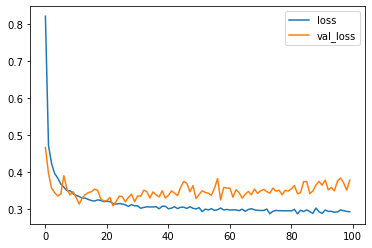

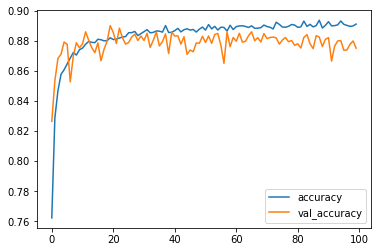

In [12]:
metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot();
metrics_df[["accuracy","val_accuracy"]].plot();


## Model evaluation

In [13]:
# And finally evaluate the accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
predictions = model.predict(test_images)
df = pd.DataFrame(predictions, columns=["0","1","2","3","4","5","6","7","8","9"])

313/313 - 1s - loss: 0.3788 - accuracy: 0.8751 - 1s/epoch - 4ms/step


## Where to go from here
Follow us on [LinkedIn](https://www.linkedin.com/company/mlnuggets), [Twitter](https://twitter.com/ml_nuggets), [GitHub](https://github.com/mlnuggets) and subscribe to our [blog](https://www.machinelearningnuggets.com/#/portal) so that you don't miss a new issue.